# Load things

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#dataDict = np.load('datainput_FinerGrid.npy')[()]
dataDict = np.load('datanewoneWithNACnow.npy')[()]
qp.printDictKeys(dataDict)
dataDict['kinCube'].shape, dataDict['potCube'].shape, dataDict['dipCUBE'].shape, dataDict['geoCUBE'].shape, dataDict['nacCUBE'].shape

dict_keys(['nacCUBE', 'thes', 'gams', 'geoCUBE', 'dipCUBE', 'kinCube', 'phis', 'potCube'])


((25, 26, 100, 9, 3),
 (25, 26, 100, 8),
 (25, 26, 100, 3, 8, 8),
 (25, 26, 100, 15, 3),
 (25, 26, 100, 8, 8, 15, 3))

In [2]:
gsm_phi_ind = dataDict['phis'].index('P000-000')
gsm_gam_ind = dataDict['gams'].index('P016-923')
gsm_the_ind = dataDict['thes'].index('P114-804')

gsm_phi_ind, gsm_gam_ind, gsm_the_ind

(14, 15, 21)

In [3]:
import quantumpropagator as qp
from quantumpropagator import labTranformA,fromLabelsToFloats

phiV, gamV, theV = fromLabelsToFloats(dataDict)

phis = labTranformA(dataDict['phis'])
gams = labTranformA(dataDict['gams'])
thes = labTranformA(dataDict['thes'])

phiL = len(phis)
gamL = len(gams)
theL = len(thes)

In [4]:
phis,phiV,phiV[0]-phiV[-1],phiV[0]-phiV[1],phiL

(array([-7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. ,
        -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,
         4. ,  4.5,  5. ]),
 array([-0.07 , -0.065, -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035,
        -0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
         0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,
         0.05 ]),
 -0.12000000000000001,
 -0.0050000000000000044,
 25)

In [5]:
gams,gamV,gamV[0]-gamV[-1],gamV[0]-gamV[1],gamL

(array([ 12.308,  12.615,  12.923,  13.231,  13.538,  13.846,  14.154,
         14.462,  14.769,  15.077,  15.385,  15.692,  16.   ,  16.308,
         16.615,  16.923,  17.231,  17.538,  17.846,  18.154,  18.462,
         18.769,  19.077,  19.385,  19.692,  20.   ]),
 array([ 0.21481512,  0.22017329,  0.2255489 ,  0.23092451,  0.23628267,
         0.24165829,  0.2470339 ,  0.25240952,  0.25776768,  0.26314329,
         0.26851891,  0.27387707,  0.27925268,  0.28462829,  0.28998646,
         0.29536207,  0.30073768,  0.30609584,  0.31147146,  0.31684707,
         0.32222269,  0.32758085,  0.33295646,  0.33833208,  0.34369024,
         0.34906585]),
 -0.13425072606340382,
 -0.0053581608036226136,
 26)

In [6]:
thes,theV,theV[0]-theV[-1],theV[0]-theV[1], theL

(array([ 124.19 ,  123.743,  123.296,  122.849,  122.402,  121.955,
         121.508,  121.061,  120.615,  120.168,  119.721,  119.274,
         118.827,  118.38 ,  117.933,  117.486,  117.039,  116.592,
         116.145,  115.698,  115.251,  114.804,  114.358,  113.911,
         113.464,  113.017,  112.57 ,  112.123,  111.676,  111.229,
         110.782,  110.335,  109.888,  109.441,  108.994,  108.547,
         108.101,  107.654,  107.207,  106.76 ,  106.313,  105.866,
         105.419,  104.972,  104.525,  104.078,  103.631,  103.184,
         102.737,  102.291,  101.844,  101.397,  100.95 ,  100.503,
         100.056,   99.609,   99.162,   98.715,   98.268,   97.821,
          97.374,   96.927,   96.48 ,   96.034,   95.587,   95.14 ,
          94.693,   94.246,   93.799,   93.352,   92.905,   92.458,
          92.011,   91.564,   91.117,   90.67 ,   90.223,   89.777,
          89.33 ,   88.883,   88.436,   87.989,   87.542,   87.095,
          86.648,   86.201,   85.754,   85.307, 

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

def do3dplot(xs,ys,zss):
    'with mesh function'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.plot_wireframe(X, Y, zss)
    ax.scatter(X, Y, zss)
    
def do3dplot2(X,Y,Z):
    'without mesh function'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_wireframe(X, Y, Z)
    ax.scatter(X, Y, Z)
    


## K matrix elements

In [8]:
def kinElem(mkelem,deriv,phi):
    expl = '{}\'th order derivative coefficient in K matrix'.format(deriv)
    tis = ['Tpp','Tpg','Tpt','Tgp','Tgg','Tgt','Ttp','Ttg','Ttt']
    tisexpl = '{} -> '.format(tis[mkelem])
    print(tisexpl + expl)
    x = gams
    y = thes
    z = dataDict['kinCube'][phi,:,:,mkelem,deriv]
    do3dplot(x,y,z)

interact(kinElem, mkelem = widgets.IntSlider(min=0,max=8,step=1,value=0), deriv = widgets.IntSlider(min=0,max=2,step=1,value=0),phi = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0));

A Jupyter Widget

In [9]:
# dataDict['kinCube'][11,10,14],dataDict['kinCube'][8,10,14]

# NAC VISUALIZATION

(25, 26, 100, 8, 8, 15, 3)


<IPython.core.display.Javascript object>


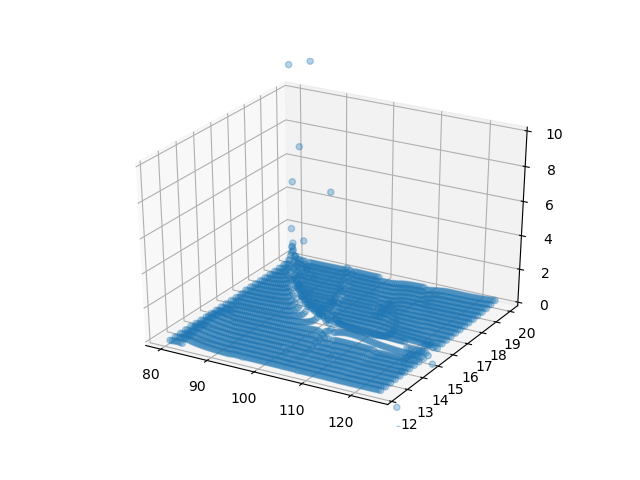

In [10]:
nac = dataDict['nacCUBE']
print(nac.shape)
cutter = nac[10,:,:,1,2,10,2]
#print(cutter)

def do3dplot3(xs,ys,zss):
    'with mesh function'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.plot_wireframe(X, Y, zss)
    ax.set_zlim(0, 10)
    ax.scatter(X, Y, zss)

do3dplot3(gams,thes,cutter)


# Potentials

In [11]:
potential = dataDict['potCube']- np.amin(dataDict['potCube'])

In [12]:
def expARR(array,howmany,direction=None):
    direction = direction or 'both'
    dx = array[1]-array[0]
    after = (array[-1] + (dx * np.arange(howmany+1)))[1:]
    before = np.flip((array[0] - (dx * np.arange(howmany+1)))[1:],0)
    if direction == 'both':
        return np.concatenate((before,array,after))
    elif direction == 'dx':
        return np.concatenate((array,after))
    elif direction == 'sx':
        return np.concatenate((before,array))

def doubleAxespoins(Y):
    N = len(Y)
    X = np.arange(0, 2*N, 2)
    X_new = np.arange(2*N-1)       # Where you want to interpolate
    Y_new = np.interp(X_new, X, Y) 
    return(Y_new)

In [13]:
def pot2D(potential,state,kind,dim):
    
    print('Doing cut in {} with value ({:8.4f},{:8.4f})'.format(kind,dimV[kind][dim],dims[kind][dim]))
    if kind == 'Phi':
        pot = potential[dim,:,:,state]
        do3dplot(gams,thes,pot)
    elif kind == 'Gam':
        pot = potential[:,dim,:,state]
        do3dplot(phis,thes,pot)
    elif kind == 'The':
        pot = potential[:,:,dim,state]
        do3dplot(phis,gams,pot)


dimV = { 'Phi': phiV, 'Gam': gamV, 'The': theV } # real values
dims = { 'Phi': phis, 'Gam': gams, 'The': thes } # for labels

state = 0
kinds = ['Phi','Gam','The']

def fun_pot2D(kind,state,dim):
    pot2D(potential, state,kind, dim)
    
def nested(kinds):
    dimensionV = dimV[kinds]
    interact(fun_pot2D, kind=fixed(kinds), state = widgets.IntSlider(min=0,max=7,step=1,value=0), dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0))

interact(nested, kinds = ['Phi','Gam','The']);

A Jupyter Widget

## 3d poly fitting

In [14]:
def polinomial_fitting(true_lines,fit_lines,both_cut, phi_cut, gam_cut, expand_N, degree_fit):
    nstates = 6
    cut_sx, cut_dx = both_cut
    fig = plt.figure(figsize=(15,10))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    y = potential[phi_cut,gam_cut,cut_sx:cut_dx,:]
    x = thes[cut_sx:cut_dx]
    tit = 'Phi = {:8.4f} | Gamma = {:8.4f}'.format(phis[phi_cut], gams[gam_cut])
    plt.title(tit)
    if true_lines:
        for iii in range(nstates):
            plt.plot(x, y[:,iii], ls='-', lw=1.5, color=colors[iii]);
        #plt.plot(x,y, ls='-', lw=1)# , marker = 'o',markersize = '1');
    coefficients = np.apply_along_axis(np.polyfit,0,x,y,degree_fit)
    ncoe, states = coefficients.shape
    new_x = expARR(x,expand_N)
    functs = np.array([ np.poly1d(coefficients[:,i])(new_x) for i in range(states)])
    new_y = functs.T
    if fit_lines:
        for iii in range(nstates):
            plt.plot(new_x, new_y[:,iii], ls='--', lw=1, color=colors[iii]);
    
interact(polinomial_fitting,
         true_lines = widgets.Checkbox(value=True, description='True values'),
         fit_lines = widgets.Checkbox(value=True, description='Fit values'),
         both_cut = widgets.IntRangeSlider(min=0,max=theL-1,step=1,value=[0, theL-1]),
         #cut_sx = widgets.IntSlider(min=0,max=theL-1,step=1,value=0),
         #cut_dx = widgets.IntSlider(min=0,max=theL-1,step=1,value=theL),
         phi_cut = widgets.IntSlider(min=0,max=phiL-1,step=1,value=16), 
         gam_cut = widgets.IntSlider(min=0,max=gamL-1,step=1,value=20), 
         expand_N = widgets.IntSlider(min=0,max=40,step=1,value=0),
         degree_fit = widgets.IntSlider(min=0,max=10,step=1,value=2));


A Jupyter Widget

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ground = potential[:,:,:,1]
tupl = ground.shape
ground.shape,phiV.shape,gamV.shape,theV.shape

phi_mesh, gam_mesh, the_mesh =  np.meshgrid(phiV,gamV,theV, indexing='ij')

phi_prime = phi_mesh.reshape(-1,1)
gam_prime = gam_mesh.reshape(-1,1)
the_prime = the_mesh.reshape(-1,1)

X = np.concatenate((phi_prime,gam_prime,the_prime), axis=1)

y = ground.reshape(-1,1)

poly = PolynomialFeatures(degree=10)

X_ = poly.fit_transform(X)

clf = LinearRegression()
clf.fit(X_, y)

prediction = clf.predict(X_)
prediction_reshaped = prediction.reshape(tupl)

corto = 0


def two_d_see_it(phi_cut):
    ground_corto = ground[phi_cut,:,:]
    pred_corto = prediction_reshaped[phi_cut,:,:]
    gam_mesh_corto = gam_mesh[phi_cut,:,:]
    the_mesh_corto = the_mesh[phi_cut,:,:]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(gam_mesh_corto, the_mesh_corto, pred_corto, s=3, alpha=.5, color='k', marker='o')
    ax.scatter(gam_mesh_corto, the_mesh_corto, ground_corto, s=3, alpha=.5, color='r', marker='o')
    #ax.scatter(X_mesh_ext, Y_mesh_ext, prediction_mesh_ext, s=3, alpha=.5, color='r', marker='o')
    fig.tight_layout()
    
interact(two_d_see_it,
         phi_cut = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0));

A Jupyter Widget

In [16]:
import scipy.io as sio

saveNew_matlab_Vector = False
phi_L, gam_L, the_L, nstates =  potential.shape


if saveNew_matlab_Vector:
    allstates = {}

    for s in range(nstates):
        ground = potential[:,:,:,s]
        tupl = ground.shape
        ground.shape,phiV.shape,gamV.shape,theV.shape

        phi_mesh, gam_mesh, the_mesh =  np.meshgrid(phiV,gamV,theV, indexing='ij')

        phi_prime = phi_mesh.reshape(-1,1)
        gam_prime = gam_mesh.reshape(-1,1)
        the_prime = the_mesh.reshape(-1,1)

        X = np.concatenate((phi_prime,gam_prime,the_prime), axis=1)

        y = ground.reshape(-1,1)

        poly = PolynomialFeatures(degree=10)

        X_ = poly.fit_transform(X)

        clf = LinearRegression()
        clf.fit(X_, y)

        prediction = clf.predict(X_)
        prediction_reshaped = prediction.reshape(tupl)
        stringName = 'TDM{}'.format(s)
        allstates[stringName] = prediction_reshaped

    sio.savemat('np_vector.mat', allstates)

In [17]:
aaa = sio.loadmat('tdm.mat')
new = aaa['v0']
new_phi_L, new_gam_L, new_the_L = new.shape
ext_potential = np.empty((new_phi_L, new_gam_L, new_the_L, nstates))

phi_cayo = expARR(phiV,15,'both')
gam_cayo = expARR(gamV,15,'both')
the_cayo = expARR(theV,30,'both')

phi_mesh_cayo, gam_mesh_cayo, the_mesh_cayo =  np.meshgrid(phi_cayo,gam_cayo,the_cayo, indexing='ij')

print(nstates)

for s in range(nstates):
    label = 'v{}'.format(s)
    ext_potential[:,:,:,s] = aaa[label]

def two_d_see_it(phi_cut,state):
    corto = phi_cut
    ground_corto = potential[corto,:,:,state]
    pred_corto_cayo = ext_potential[corto+15,:,:,state]
    gam_mesh_corto = gam_mesh[corto,:,:]
    the_mesh_corto = the_mesh[corto,:,:]
    gam_mesh_corto_cayo = gam_mesh_cayo[corto+15,:,:]
    the_mesh_corto_cayo = the_mesh_cayo[corto+15,:,:]
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(gam_mesh_corto_cayo, the_mesh_corto_cayo, pred_corto_cayo, s=3, alpha=.2, color='k', marker='o')
    ax.scatter(gam_mesh_corto, the_mesh_corto, ground_corto, s=3, alpha=.5, color='r', marker='o')
    #ax.scatter(X_mesh_ext, Y_mesh_ext, prediction_mesh_ext, s=3, alpha=.5, color='r', marker='o')
    fig.tight_layout()
    
interact(two_d_see_it,
         phi_cut = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0),
         state = widgets.IntSlider(min=0,max=7,step=1,value=0));

8


A Jupyter Widget

In [18]:
ppL, ggL, ttL = new.shape
phis_n = phi_cayo
gams_n = gam_cayo
thes_n = the_cayo

pp_cayo,gg_cayo,tt_cayo = qp.fromFloatsToLabels(phi_cayo, gam_cayo, the_cayo)


In [19]:
a = np.arange(6) + 0.5
b = a


In [20]:
umass = 1836

C_mass = 12 * umass
H_mass = 1  * umass

pi = 20
gi = 20
ti = 40
i = 0
j = 1

p = phis_n[pi]
g = gams_n[gi]
t = thes_n[ti]

s = qp.calc_s_mat(p,g,t) #verbose
thisnacelement = nacINSIDE[pi,gi,ti,i,j] # I want nac
thisnacelement_linear = np.concatenate(thisnacelement[7:],axis=0) # nac put in the smae order as s matrix
massVector = np.array([C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass])
thisnacelement_linear/massVector


NameError: name 'nacINSIDE' is not defined

In [21]:
import pickle

doublALL = np.zeros((ppL,ggL,ttL))
doublALL2 = np.zeros((ppL,ggL,ttL,8))
kineti = np.zeros((ppL,ggL,ttL,9,3))
smo = np.zeros((ppL,ggL,ttL,8,8,3))
geom = np.zeros((ppL,ggL,ttL,15,3))
dipo = np.zeros((ppL,ggL,ttL,3,8,8))
#nac = np.zeros((ppL,ggL,ttL,8,8,15,3))

nacINSIDE = np.pad(dataDict['nacCUBE'], [(15, 15), (15, 15), (30, 30), (0, 0), (0, 0), (0, 0), (0, 0)], mode='constant')

umass = 1836

C_mass = 12 * umass
H_mass = 1  * umass

# Toggle this
saveNew = True
saveFile = False

if saveNew:
    for pi, p in qp.log_progress(enumerate(phis_n),every=1,size=(len(phis_n))):
        for gi, g in enumerate(gams_n):
            for ti,t in enumerate(thes_n):
                kineti[pi,gi,ti] = qp.calc_g_G(p,g,t)
                smo_element = qp.calc_s_mat(p,g,t)
                geom[pi,gi,ti] = qp.generateNorbGeometry(p,g,t,True) # True is the "vector" mode that does not save any file
                for i in range(8):
                    for j in range(8):
                        thisnacelement = nacINSIDE[pi,gi,ti,i,j] # I want nac
                        # I need nac to be divided by mass
                        thisnacelement_linear = np.concatenate(thisnacelement[7:],axis=0) # nac put in the smae order as s matrix
                        massVector = np.array([C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass])
                        final_scaled_vector_tau_prime = thisnacelement_linear/massVector
                        smo[pi,gi,ti,i,j] = smo_element@final_scaled_vector_tau_prime
               

    newdict = {}
    newdict['smoCube'] = smo
    newdict['kinCube'] = kineti
    newdict['potCube'] = ext_potential
    newdict['dipCUBE'] = np.pad(dataDict['dipCUBE'], [(15, 15), (15, 15), (30, 30), (0, 0), (0, 0), (0, 0)], mode='constant')
    newdict['geoCUBE'] = geom
    newdict['phis'] = pp_cayo
    newdict['gams'] = gg_cayo
    newdict['thes'] = tt_cayo

    if saveFile:
        with open('newExtrapolated_allCorrection.pickle', 'wb') as f:
            pickle.dump(newdict, f, pickle.HIGHEST_PROTOCOL)
            #np.save('newExtrapolated_allCorrection.npy', newdict)
            qp.printDict(newdict)

KeyboardInterrupt: 

In [ ]:
print(smo.shape)

ah = smo[15:-15,15:-15,30:-30,:,:,:]

def two_NAC_see_it(phi_cut, save=None):
    
    save = save or False
    cut_phi = ah[phi_cut,:,:,:,:,:]
    
    X,Y = np.meshgrid(thes,gams)
    
    maxi=3
    mini=-3
    
    fig = plt.figure(figsize=(40,15))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    
    all_states_indexes = np.arange(nstates)
    
    for i in all_states_indexes:
        others = np.delete(all_states_indexes, [i], axis=0)
        ax1 = fig.add_subplot(3,8,i+1, projection='3d')
        ax1.set_title('Phi: {} | State {} along X'.format(phi_cut,i))
        ax1.set_xlabel('Theta')
        ax1.set_ylabel('Gamma')
        ax1.set_zlabel('DipoleValue')
        #ax1.set_zlim(mini,maxi)

        ax2 = fig.add_subplot(3,8,i+9, projection='3d')
        ax2.set_title('State {} along Y'.format(i))
        ax2.set_xlabel('Theta')
        ax2.set_ylabel('Gamma')
        ax2.set_zlabel('DipoleValue')
        #ax2.set_zlim(mini,maxi)        
        
        ax3 = fig.add_subplot(3,8,i+17, projection='3d')
        ax3.set_title('State {} along Z'.format(i))
        ax3.set_xlabel('Theta')
        ax3.set_ylabel('Gamma')
        ax3.set_zlabel('DipoleValue')
        #ax3.set_zlim(mini,maxi)        

        
        for j in others:
            cutfirst = cut_phi[:,:,i,j,:]
            cutx = cutfirst[:,:,0]
            cuty = cutfirst[:,:,1]
            cutz = cutfirst[:,:,2]
            
            col = colors[j]
            
            ax1.plot_wireframe(X,Y,cutx, alpha=.5, color=col)
            ax2.plot_wireframe(X,Y,cuty, alpha=.5, color=col)
            ax3.plot_wireframe(X,Y,cutz, alpha=.5, color=col)

    
    fig.tight_layout()
    

    if save:
        name_fig = 'NACMATRIX_phi{:02d}.png'.format(phi_cut)
        fig.savefig(name_fig)

savefigures = False        

if savefigures:
    for phi_cut in range(phiL):
        two_NAC_see_it(phi_cut,True)
                

#two_NAC_see_it(phi_cut,True)

# Visualization of dipoles

In [22]:
dipo.shape

(55, 56, 160, 3, 8, 8)

In [23]:
dipo = dataDict['dipCUBE']


def two_d_see_it(phi_cut, save=None):
    
    save = save or False
    cut_phi = dipo[phi_cut,:,:,:,:,:]
    
    X,Y = np.meshgrid(thes,gams)
    
    maxi=3
    mini=-3
    
    fig = plt.figure(figsize=(40,15))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    
    all_states_indexes = np.arange(nstates)
    
    for i in all_states_indexes:
        others = np.delete(all_states_indexes, [i], axis=0)
        ax1 = fig.add_subplot(3,8,i+1, projection='3d')
        ax1.set_title('Phi: {} | State {} along X'.format(phi_cut,i))
        ax1.set_xlabel('Theta')
        ax1.set_ylabel('Gamma')
        ax1.set_zlabel('DipoleValue')
        ax1.set_zlim(mini,maxi)

        ax2 = fig.add_subplot(3,8,i+9, projection='3d')
        ax2.set_title('State {} along Y'.format(i))
        ax2.set_xlabel('Theta')
        ax2.set_ylabel('Gamma')
        ax2.set_zlabel('DipoleValue')
        ax2.set_zlim(mini,maxi)        
        
        ax3 = fig.add_subplot(3,8,i+17, projection='3d')
        ax3.set_title('State {} along Z'.format(i))
        ax3.set_xlabel('Theta')
        ax3.set_ylabel('Gamma')
        ax3.set_zlabel('DipoleValue')
        ax3.set_zlim(mini,maxi)        

        
        for j in others:
            cutfirst = cut_phi[:,:,:,i,j]
            cutx = cutfirst[:,:,0]
            cuty = cutfirst[:,:,1]
            cutz = cutfirst[:,:,2]
            
            col = colors[j]
            
            ax1.plot_wireframe(X,Y,cutx, alpha=.5, color=col)
            ax2.plot_wireframe(X,Y,cuty, alpha=.5, color=col)
            ax3.plot_wireframe(X,Y,cutz, alpha=.5, color=col)

    
    fig.tight_layout()
    

    if save:
        name_fig = 'dipolematrix_phi{:02d}.png'.format(phi_cut)
        fig.savefig(name_fig)

savefigures = False        

if savefigures:
    for phi_cut in range(phiL):
        two_d_see_it(phi_cut,True)
        


<IPython.core.display.Javascript object>


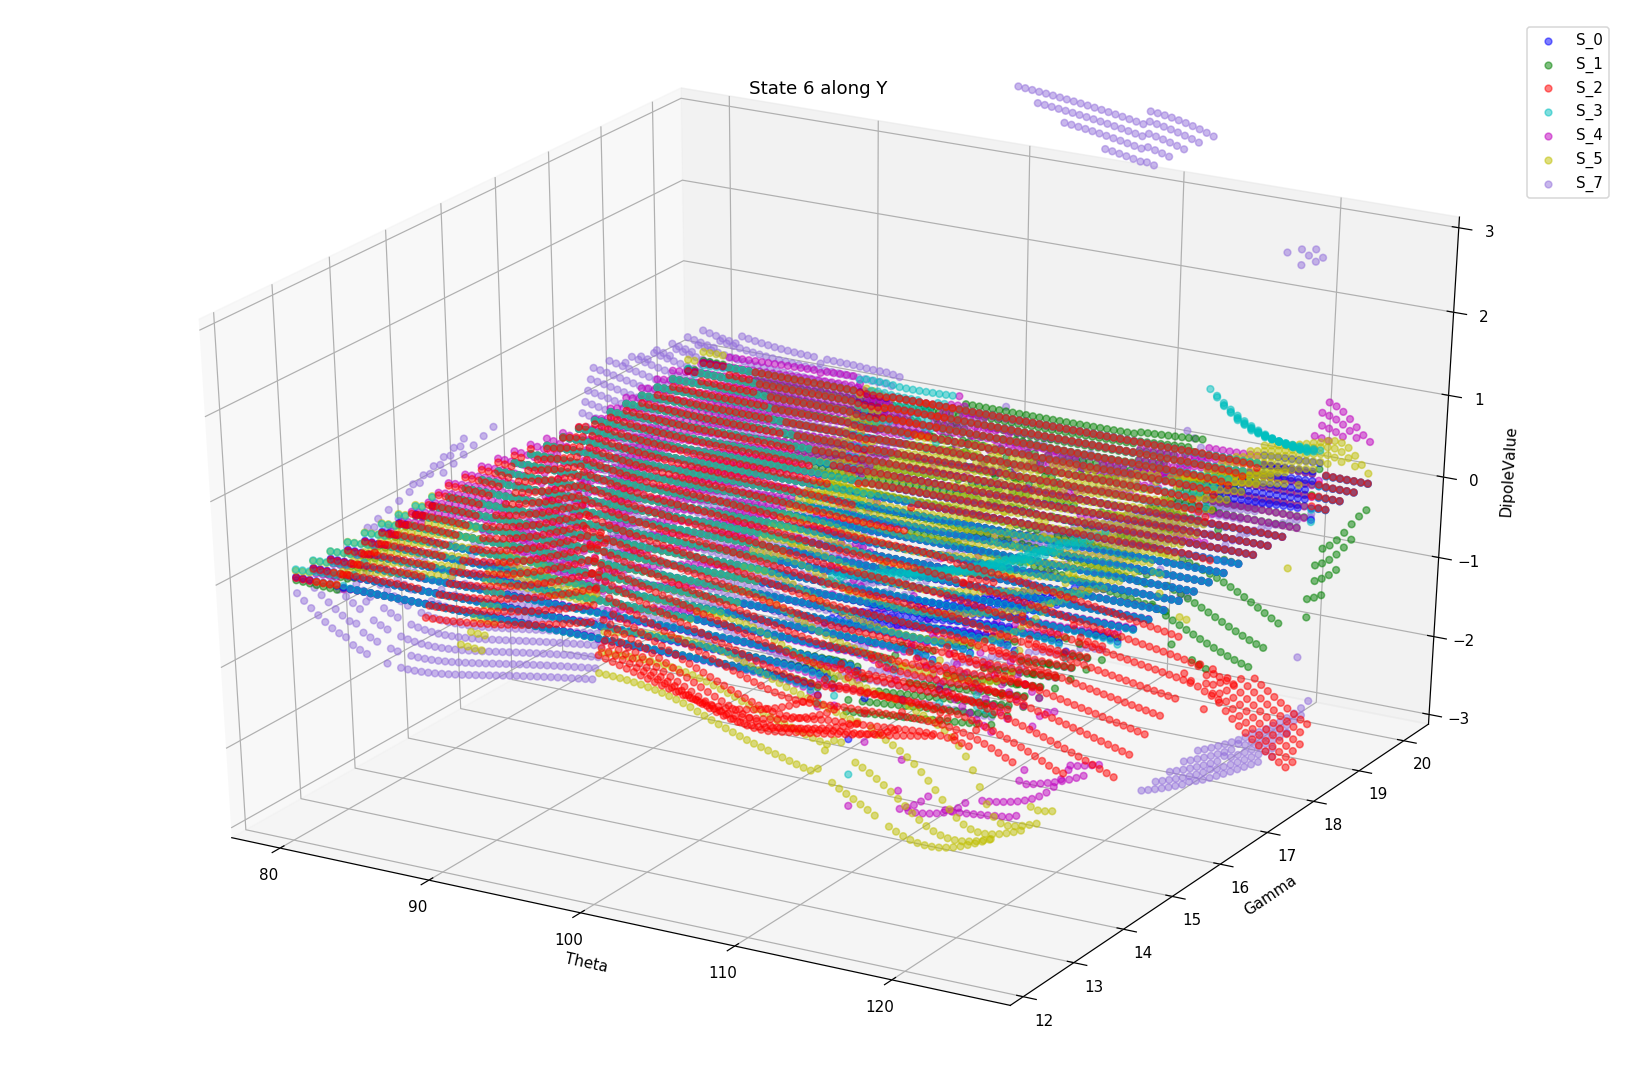

In [24]:
def two_d_see_it_Only_One(phi_cut,state1,xyz):
    
    cut_phi = dipo[phi_cut,:,:,:,:,:]
    
    X,Y = np.meshgrid(thes,gams)
    
    maxi=3
    mini=-3
    
    fig = plt.figure(figsize=(15,10))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    
    all_states_indexes = np.arange(nstates)
    
    i=state1
    
    others = np.delete(all_states_indexes, [i], axis=0)
    ax1 = fig.add_subplot(111, projection='3d')
    stringXYZ = ['X','Y','Z']
    ax1.set_title('State {} along {}'.format(i,stringXYZ[xyz]))
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Gamma')
    ax1.set_zlabel('DipoleValue')
    ax1.set_zlim(mini,maxi)

    for j in others:
        cutfirst = cut_phi[:,:,:,i,j]
        cutx = cutfirst[:,:,xyz]

        col = colors[j]
        laby = r'S_{}'.format(j)
        #ax1.plot_wireframe(X,Y,cutx, alpha=.5, color=col, label=laby)
        ax1.scatter(X,Y,cutx, alpha=.5, color=col, label=laby)
    
    fig.tight_layout()
    ax1.legend()
    
phi_cut = 6
state1 = 6
xyz = 1

two_d_see_it_Only_One(phi_cut,state1,xyz)

# Surface interpolation

In [26]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = linspace(1,4,11)
y = linspace(4,7,22)
z = linspace(7,9,33)
V = zeros((11,22,33))

for i in range(11):
    for j in range(22):
        for k in range(33):
            V[i,j,k] = 100*x[i] + 10*y[j] + z[k]

fn = RegularGridInterpolator((x,y,z), V)
pts = array([[2,6,8],[3,5,7]])
print(fn(pts))

[ 268.  357.]


In [27]:
nstates = 8

# h is for "here" i.e. in this point of the code (not extrapolated)

phi_h = phiV
gam_h = gamV
the_h = np.flip(theV,0)

pp_h,gg_h,tt_h = qp.fromFloatsToLabels(phi_h, gam_h, the_h)
ppL_h = len(pp_h)
ggL_h = len(gg_h)
ttL_h = len(tt_h)

int_pot_linear = np.empty((ppL_h,ggL_h,ttL_h,nstates))
int_pot_nearest = np.empty((ppL_h,ggL_h,ttL_h,nstates))

dointerpolation = False

if dointerpolation:
    for s in range(nstates):
        print('Doing state {}.'.format(s))
        aa = potential[:,:,:,s]
        fnn1 = RegularGridInterpolator((phi_h,gam_h,the_h), aa, method='linear')
        fnn2 = RegularGridInterpolator((phi_h,gam_h,the_h), aa, method='nearest')
        for pi, p in qp.log_progress(enumerate(phi_h),every=1,size=(len(phi_h))):
            for gi, g in enumerate(gam_h):
                for ti,t in enumerate(the_h):
                    int_pot_linear[pi,gi,ti,s] = fnn1(array([p,g,t]))
                    int_pot_nearest[pi,gi,ti,s] = fnn2(array([p,g,t]))
               

Doing cut in Phi with value ( -0.0700, -7.0000)


<IPython.core.display.Javascript object>


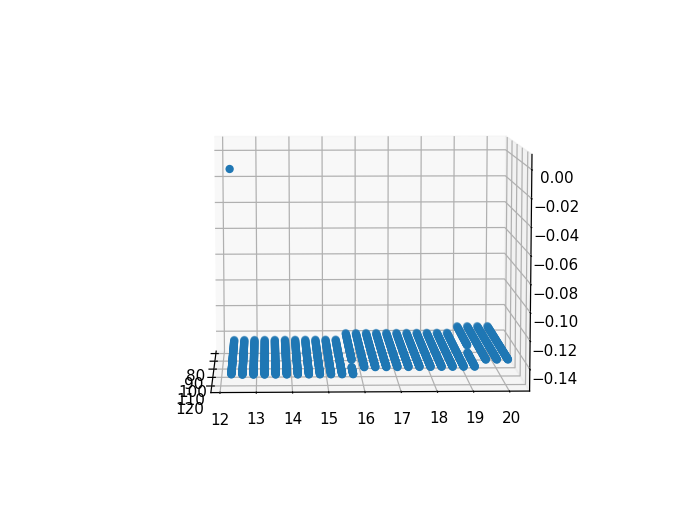

In [28]:
def fun_pot2D_inter(kind,state,dim):
    pot2D(int_pot_linear, state,kind, dim)
    #pot2D(int_pot_nearest, state,kind, dim)

fun_pot2D_inter('Phi',1,0)

# Double the grid

In [27]:
phiV,gamV,theV

(array([-0.07 , -0.065, -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035,
        -0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
         0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,
         0.05 ]),
 array([ 0.21481512,  0.22017329,  0.2255489 ,  0.23092451,  0.23628267,
         0.24165829,  0.2470339 ,  0.25240952,  0.25776768,  0.26314329,
         0.26851891,  0.27387707,  0.27925268,  0.28462829,  0.28998646,
         0.29536207,  0.30073768,  0.30609584,  0.31147146,  0.31684707,
         0.32222269,  0.32758085,  0.33295646,  0.33833208,  0.34369024,
         0.34906585]),
 array([ 1.0837622 ,  1.07986139,  1.07596058,  1.07205977,  1.06815896,
         1.06425814,  1.06035733,  1.05645652,  1.05256444,  1.04866363,
         1.04476282,  1.04086201,  1.0369612 ,  1.03306038,  1.02915957,
         1.02525876,  1.02135795,  1.01745714,  1.01355633,  1.00965552,
         1.00575471,  1.0018539 ,  0.99796181,  0.994061  ,  0.99016019,
         0.98

In [28]:
# gestionate Phi
refi_phi = 1
expandi_phi = 0

phis_n = phiV
phis_n = expARR(phis_n,expandi_phi)
for _ in range(refi_phi):
    phis_n = doubleAxespoins(phis_n)


# gestionate Gam
refi_gam = 1
expandi_gam = 0

gams_n = gamV
gams_n = expARR(gams_n,expandi_gam)
for _ in range(refi_gam):
    gams_n = doubleAxespoins(gams_n)


# gestionate The
refi_the = 1
expandi_the = 0

thes_n = theV
thes_n = expARR(thes_n,expandi_the)
for _ in range(refi_the):
    thes_n = doubleAxespoins(thes_n)

# equilibrium indices and equilibrium points
p0 = phis_n[(gsm_phi_ind+expandi_phi)*2**refi_phi] 
g0 = gams_n[(gsm_gam_ind+expandi_gam)*2**refi_gam]
t0 = thes_n[(gsm_the_ind+expandi_the)*2**refi_the]

print(p0,g0,t0)
    
    
pp,gg,tt = qp.fromFloatsToLabels(phis_n, gams_n, thes_n)
ppL = len(pp)
ggL = len(gg)
ttL = len(tt)

0.0 0.295362069315 1.00185389723


In [29]:
phis_n,gams_n,thes_n

(array([-0.07  , -0.0675, -0.065 , -0.0625, -0.06  , -0.0575, -0.055 ,
        -0.0525, -0.05  , -0.0475, -0.045 , -0.0425, -0.04  , -0.0375,
        -0.035 , -0.0325, -0.03  , -0.0275, -0.025 , -0.0225, -0.02  ,
        -0.0175, -0.015 , -0.0125, -0.01  , -0.0075, -0.005 , -0.0025,
         0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,
         0.0175,  0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,
         0.035 ,  0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ]),
 array([ 0.21481512,  0.2174942 ,  0.22017329,  0.22286109,  0.2255489 ,
         0.22823671,  0.23092451,  0.23360359,  0.23628267,  0.23897048,
         0.24165829,  0.2443461 ,  0.2470339 ,  0.24972171,  0.25240952,
         0.2550886 ,  0.25776768,  0.26045548,  0.26314329,  0.2658311 ,
         0.26851891,  0.27119799,  0.27387707,  0.27656487,  0.27925268,
         0.28194049,  0.28462829,  0.28730737,  0.28998646,  0.29267426,
         0.29536207,  0.29804988,  0.30073768,  0.30341676,  0.

In [30]:
print('       |  eq.    #p.     dx       dL')
strngOut = 'Phi:   {:8.4f} {:4} {:10.3e} {:10.3e} \nGamma: {:8.4f} {:4} {:10.3e} {:10.3e} \nTheta: {:8.4f} {:4} {:10.3e} {:10.3e}'
print(strngOut.format(p0,len(phis_n),phis_n[1]-phis_n[0],phis_n[-1]-phis_n[0],g0,len(gams_n), gams_n[1]-gams_n[0],gams_n[-1]-gams_n[0],t0,len(thes_n),thes_n[1]-thes_n[0],thes_n[-1]-thes_n[0]))

       |  eq.    #p.     dx       dL
Phi:     0.0000   49  2.500e-03  1.200e-01 
Gamma:   0.2954   51  2.679e-03  1.343e-01 
Theta:   1.0019  199 -1.950e-03 -3.861e-01


# Harmonic potentials

In [31]:
doublALL = np.zeros((ppL,ggL,ttL))
doublALL2 = np.zeros((ppL,ggL,ttL,8))
kineti = np.zeros((ppL,ggL,ttL,9,3))
smo = np.zeros((ppL,ggL,ttL,3,24))
geom = np.zeros((ppL,ggL,ttL,15,3))

p_s = 100
g_s = 100
t_s = 100

# Toggle this to calculate harmonic potentials
saveNew = False

if saveNew:
    for pi, p in qp.log_progress(enumerate(phis_n),every=1,size=(len(phis_n))):
        for gi, g in enumerate(gams_n):
            for ti,t in enumerate(thes_n):
                doublALL[pi,gi,ti] = p_s*(p-p0)**2 + g_s*(g-g0)**2 + t_s*(t-t0)**2
                kineti[pi,gi,ti] = qp.calc_g_G(p,g,t)
                smo[pi,gi,ti] = qp.calc_s_mat(p,g,t)
                geom = qp.generateNorbGeometry(p,g,t,True) # True is the "vector" mode that does not save any file
            
    doublALL2[:,:,:,0] = doublALL

    newdict = {}
    newdict['smoCube'] = smo
    newdict['kinCube'] = kineti
    newdict['potCube'] = doublALL2
    newdict['dipCUBE'] = np.zeros((ppL,ggL,ttL,3,8,8))
    newdict['geoCUBE'] = geom
    newdict['phis'] = pp
    newdict['gams'] = gg
    newdict['thes'] = tt

    np.save('doubledoublefinerArmonic.npy', newdict)
    qp.printDict(newdict)

# Attempt at doing absorbing potential

In [32]:
#%matplotlib inline

a = 1
b = 50
c = 9
re = np.pi-0.01

x = np.linspace(-10,10,50)

#y = a * (np.arctan(b*(x + c)) + np.arctan(b*(x - c)))

y = a * ((-np.arctan(b*(x + c)) + np.arctan(b*(x - c)))+re)

y = np.where(y<0,0,y)

plt.plot(x,y)

y

/home/alessio/config/miniconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:560: RuntimeWarning: overflow encountered in double_scalars
  z0 -= delta


array([  3.11264795e+00,   3.09888815e+00,   3.02423097e+00,
         7.99814578e-02,   2.27539643e-02,   1.03926232e-02,
         5.01032456e-03,   2.00775189e-03,   9.96752819e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   9.96752819e-05,
         2.00775189e-03,   5.01032456e-03,   1.03926232e-02,
         2.27539643e-02,   7.99814578e-02,   3.02423097e+00,
         3.09888815e+00,

# CENTER OF MASS

In [33]:
dataDict['geoCUBE'].shape

(25, 26, 100, 15, 3)

In [34]:
Mc = qp.massOf('C')
Mh = qp.massOf('H')

def massCenter(geom):
    masses = np.array([Mc,Mc,Mc,Mh,Mh,Mh,Mh,Mc,Mc,Mc,Mc,Mh,Mh,Mh,Mh])
    total_mass = sum(masses)
    zcoor = geom[:,2]
    z_cm = sum(masses * zcoor)
    return(z_cm/total_mass)

    
equi = dataDict['geoCUBE'][gsm_phi_ind, gsm_gam_ind, gsm_the_ind]



In [35]:
centerofMass = np.empty((phiL,gamL,theL))

for pi, p in qp.log_progress(enumerate(phiV),every=1,size=(phiL)):
    for gi, g in enumerate(gamV):
        for ti,t in enumerate(theV):
            centerofMass[pi,gi,ti] = massCenter(dataDict['geoCUBE'][pi,gi,ti])
    
centerofMass.shape

(25, 26, 100)

<IPython.core.display.Javascript object>


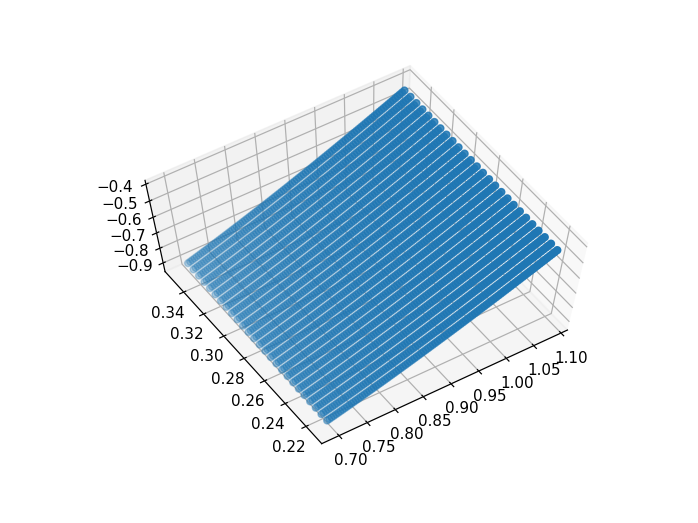

<IPython.core.display.Javascript object>


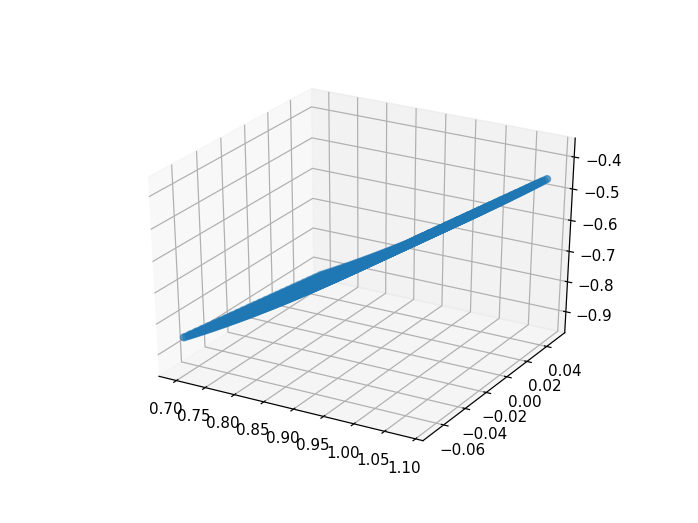

<IPython.core.display.Javascript object>


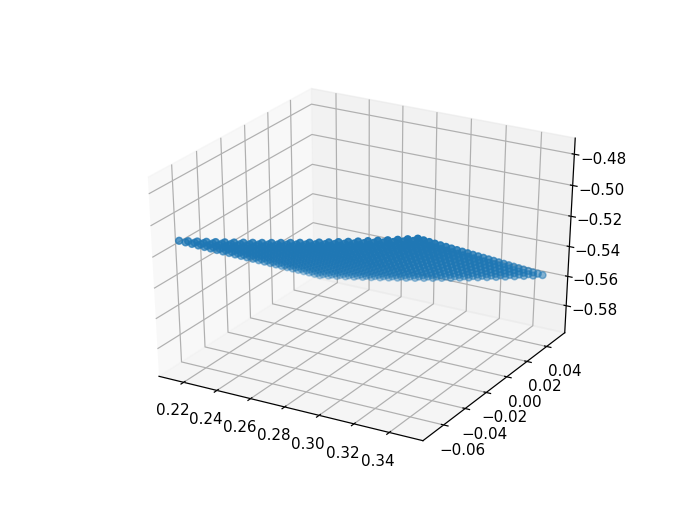

In [36]:
#%matplotlib notebook
do3dplot(gamV,theV,centerofMass[gsm_phi_ind,:,:])
do3dplot(phiV,theV,centerofMass[:,gsm_gam_ind,:])
do3dplot(phiV,gamV,centerofMass[:,:,gsm_the_ind])